In [1]:
!python3.6 -m pip install tensorboardX torch librosa tqdm lws wavenet_vocoder
!apt-get install libsndfile1 --yes

     |████████████████████████████████| 204kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 753.4MB 120kB/s  eta 0:00:01
     |████████████████████████████████| 1.6MB 8.3MB/s eta 0:00:01
     |████████████████████████████████| 61kB 15.8MB/s eta 0:00:01
     |████████████████████████████████| 153kB 13.8MB/s eta 0:00:01
     |████████████████████████████████| 26.1MB 12.1MB/s eta 0:00:01
     |████████████████████████████████| 7.1MB 8.2MB/s eta 0:00:01
     |████████████████████████████████| 296kB 6.7MB/s eta 0:00:01
     |████████████████████████████████| 327kB 6.3MB/s eta 0:00:01
     |████████████████████████████████| 3.7MB 13.4MB/s eta 0:00:01
     |████████████████████████████████| 20.2MB 12.2MB/s eta 0:00:01
     |████████████████████████████████| 399kB 12.2MB/s eta 0:00:01
     |████████████████████████████████| 163kB 8.3MB/s eta 0:00:01
  Created wheel for librosa: filename=librosa-0.7.2-cp36-none-any.whl size=1613955 sha256=0eb124a62f066ad4a2912abee654958e743f770f01

Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libvorbis0a amd64 1.3.5-4.2 [86.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libvorbisenc2 amd64 1.3.5-4.2 [70.7 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libsndfile1 amd64 1.0.28-4ubuntu0.18.04.1 [170 kB]
Fetched 557 kB in 1s (1059 kB/s)    
debconf: delaying package configuration, since apt-utils is not installed
Selecting previously unselected package libogg0:amd64.
(Reading database ... 15402 files and directories currently installed.)
Preparing to unpack .../libogg0_1.3.2-1_amd64.deb ...
Unpacking libogg0:amd64 (1.3.2-1) ...
Selecting previously unselected package libflac8:amd64.
Preparing to unpack .../libflac8_1.3.2-1_amd64.deb ...
Unpacking libflac8:amd64 (1.3.2-1) ...
Selecting previously unselected package libvorbis0a:amd64.
Preparing to unpack .../libvorbis0a_1.3.5-4.2_amd64.deb ...
Unpacking libvorbis0a:amd64 (1.3.5-4.2) ...
Selecting previously unselected package libvorbis

# Train

In [ ]:
import torch
from torch import optim
from torch.autograd import Variable
import numpy as np
import pickle
from utils import Hps
from utils import DataLoader
from utils import Logger
from utils import SingleDataset
from solver import Solver
import argparse
%matplotlib inline

args_load_model=True
args_flag='train'
args_hps_path="vctk.json"
args_dataset_path_trg="vctk_old/data-wavenet.h5"
args_dataset_path="vctk_old/data-8-wavenet.h5"
args_index_path_trg="vctk_old/index-wavenet.json"
args_index_path="vctk_old/index-wavenet.json"
args_output_model_path="model_vctk/model_vctk"
args_load_model_path="model_vctk/mel_gen/model_vctk-146000"
resume_epoch=66000
wavenet_mel=True

hps = Hps()
hps.load(args_hps_path)
hps_tuple = hps.get_tuple()
dataset = SingleDataset(args_dataset_path, args_index_path, seg_len=hps_tuple.seg_len)
dataset_trg = SingleDataset(args_dataset_path_trg, args_index_path_trg, seg_len=hps_tuple.seg_len)
data_loader = DataLoader(dataset, dataset_trg)

solver = Solver(hps_tuple, data_loader, wavenet_mel)
if args_load_model:
    solver.load_model(args_load_model_path)

#solver.train(args_output_model_path, args_flag, mode='pretrain_G')
#solver.train(args_output_model_path, args_flag, mode='pretrain_D')
#solver.train(args_output_model_path, args_flag, mode='train')
solver.train(args_output_model_path, args_flag, mode='patchGAN', resume_epoch=resume_epoch)

load model from model_vctk/mel_gen/model_vctk-146000


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


patch_D-0:[066001/050000], w_dis=0.12, gp=1999.61, loss_clf=3.45, acc=0.00
patch_D-1:[066001/050000], w_dis=0.41, gp=1549.43, loss_clf=3.21, acc=0.00
patch_D-2:[066001/050000], w_dis=0.10, gp=1929.56, loss_clf=3.35, acc=0.00
patch_D-3:[066001/050000], w_dis=0.15, gp=1319.20, loss_clf=3.05, acc=0.06
patch_D-4:[066001/050000], w_dis=0.00, gp=1267.22, loss_clf=2.95, acc=0.06
patch_G:[066001/050000], loss_adv=0.26, loss_clf=3.22, acc=0.12
patch_D-0:[066002/050000], w_dis=0.10, gp=1047.28, loss_clf=3.33, acc=0.00
patch_D-1:[066002/050000], w_dis=-0.24, gp=703.23, loss_clf=3.23, acc=0.12
patch_D-2:[066002/050000], w_dis=-0.25, gp=573.83, loss_clf=3.18, acc=0.00
patch_D-3:[066002/050000], w_dis=0.23, gp=377.93, loss_clf=3.27, acc=0.06
patch_D-4:[066002/050000], w_dis=-0.08, gp=333.48, loss_clf=3.23, acc=0.00
patch_G:[066002/050000], loss_adv=-0.17, loss_clf=3.50, acc=0.00
patch_D-0:[066003/050000], w_dis=-0.21, gp=365.39, loss_clf=3.26, acc=0.06
patch_D-1:[066003/050000], w_dis=0.14, gp=263.2

patch_D-1:[066020/050000], w_dis=0.21, gp=0.01, loss_clf=2.94, acc=0.12
patch_D-2:[066020/050000], w_dis=0.21, gp=0.01, loss_clf=2.92, acc=0.19
patch_D-3:[066020/050000], w_dis=-0.04, gp=0.02, loss_clf=2.85, acc=0.12
patch_D-4:[066020/050000], w_dis=0.02, gp=0.03, loss_clf=2.92, acc=0.06
patch_G:[066020/050000], loss_adv=-0.80, loss_clf=3.04, acc=0.06
patch_D-0:[066021/050000], w_dis=0.14, gp=0.09, loss_clf=2.98, acc=0.12
patch_D-1:[066021/050000], w_dis=0.04, gp=0.02, loss_clf=3.01, acc=0.12
patch_D-2:[066021/050000], w_dis=0.15, gp=0.02, loss_clf=2.89, acc=0.06
patch_D-3:[066021/050000], w_dis=-0.02, gp=0.03, loss_clf=3.08, acc=0.12
patch_D-4:[066021/050000], w_dis=0.02, gp=0.02, loss_clf=2.71, acc=0.06
patch_G:[066021/050000], loss_adv=-0.43, loss_clf=2.77, acc=0.12
patch_D-0:[066022/050000], w_dis=-0.06, gp=0.05, loss_clf=3.04, acc=0.00
patch_D-1:[066022/050000], w_dis=0.12, gp=0.01, loss_clf=2.69, acc=0.25
patch_D-2:[066022/050000], w_dis=-0.09, gp=0.02, loss_clf=2.97, acc=0.12
pa

patch_D-3:[066039/050000], w_dis=0.13, gp=0.02, loss_clf=3.01, acc=0.00
patch_D-4:[066039/050000], w_dis=0.20, gp=0.03, loss_clf=2.94, acc=0.06
patch_G:[066039/050000], loss_adv=-0.48, loss_clf=2.67, acc=0.06
patch_D-0:[066040/050000], w_dis=0.04, gp=0.02, loss_clf=2.81, acc=0.12
patch_D-1:[066040/050000], w_dis=0.12, gp=0.04, loss_clf=2.83, acc=0.19
patch_D-2:[066040/050000], w_dis=0.23, gp=0.03, loss_clf=2.71, acc=0.25
patch_D-3:[066040/050000], w_dis=0.08, gp=0.05, loss_clf=2.92, acc=0.06
patch_D-4:[066040/050000], w_dis=-0.11, gp=0.02, loss_clf=2.63, acc=0.19
patch_G:[066040/050000], loss_adv=-0.35, loss_clf=2.92, acc=0.00
patch_D-0:[066041/050000], w_dis=0.16, gp=0.02, loss_clf=2.73, acc=0.19
patch_D-1:[066041/050000], w_dis=0.23, gp=0.01, loss_clf=2.81, acc=0.19
patch_D-2:[066041/050000], w_dis=0.07, gp=0.02, loss_clf=3.04, acc=0.12
patch_D-3:[066041/050000], w_dis=0.42, gp=0.02, loss_clf=2.70, acc=0.19
patch_D-4:[066041/050000], w_dis=0.46, gp=0.02, loss_clf=2.65, acc=0.31
patch

patch_D-0:[066059/050000], w_dis=0.22, gp=0.01, loss_clf=2.75, acc=0.31
patch_D-1:[066059/050000], w_dis=0.22, gp=0.02, loss_clf=2.68, acc=0.19
patch_D-2:[066059/050000], w_dis=0.26, gp=0.02, loss_clf=2.67, acc=0.06
patch_D-3:[066059/050000], w_dis=0.35, gp=0.02, loss_clf=2.66, acc=0.19
patch_D-4:[066059/050000], w_dis=0.13, gp=0.03, loss_clf=2.76, acc=0.19
patch_G:[066059/050000], loss_adv=0.20, loss_clf=2.72, acc=0.12
patch_D-0:[066060/050000], w_dis=0.09, gp=0.02, loss_clf=2.94, acc=0.00
patch_D-1:[066060/050000], w_dis=0.09, gp=0.01, loss_clf=2.63, acc=0.31
patch_D-2:[066060/050000], w_dis=0.27, gp=0.02, loss_clf=2.50, acc=0.38
patch_D-3:[066060/050000], w_dis=-0.05, gp=0.03, loss_clf=2.94, acc=0.06
patch_D-4:[066060/050000], w_dis=0.02, gp=0.02, loss_clf=2.85, acc=0.06
patch_G:[066060/050000], loss_adv=0.90, loss_clf=2.47, acc=0.31
patch_D-0:[066061/050000], w_dis=0.58, gp=0.02, loss_clf=2.80, acc=0.12
patch_D-1:[066061/050000], w_dis=-0.19, gp=0.11, loss_clf=2.94, acc=0.06
patch_

patch_D-2:[066078/050000], w_dis=0.23, gp=0.02, loss_clf=2.46, acc=0.25
patch_D-3:[066078/050000], w_dis=0.30, gp=0.03, loss_clf=2.57, acc=0.25
patch_D-4:[066078/050000], w_dis=0.20, gp=0.05, loss_clf=2.33, acc=0.38
patch_G:[066078/050000], loss_adv=-0.44, loss_clf=2.15, acc=0.44
patch_D-0:[066079/050000], w_dis=0.28, gp=0.03, loss_clf=2.73, acc=0.19
patch_D-1:[066079/050000], w_dis=0.39, gp=0.05, loss_clf=2.61, acc=0.25
patch_D-2:[066079/050000], w_dis=0.14, gp=0.02, loss_clf=2.74, acc=0.12
patch_D-3:[066079/050000], w_dis=0.45, gp=0.01, loss_clf=2.78, acc=0.19
patch_D-4:[066079/050000], w_dis=0.46, gp=0.02, loss_clf=2.64, acc=0.19
patch_G:[066079/050000], loss_adv=0.31, loss_clf=2.23, acc=0.44
patch_D-0:[066080/050000], w_dis=-0.00, gp=0.03, loss_clf=2.64, acc=0.19
patch_D-1:[066080/050000], w_dis=0.26, gp=0.03, loss_clf=2.46, acc=0.31
patch_D-2:[066080/050000], w_dis=0.31, gp=0.03, loss_clf=2.46, acc=0.25
patch_D-3:[066080/050000], w_dis=-0.09, gp=0.02, loss_clf=2.05, acc=0.44
patch

patch_D-4:[066097/050000], w_dis=0.23, gp=0.14, loss_clf=2.21, acc=0.31
patch_G:[066097/050000], loss_adv=0.00, loss_clf=2.19, acc=0.31
patch_D-0:[066098/050000], w_dis=0.33, gp=0.05, loss_clf=2.34, acc=0.19
patch_D-1:[066098/050000], w_dis=0.24, gp=0.04, loss_clf=1.85, acc=0.44
patch_D-2:[066098/050000], w_dis=0.14, gp=0.03, loss_clf=2.58, acc=0.06
patch_D-3:[066098/050000], w_dis=0.31, gp=0.03, loss_clf=1.69, acc=0.69
patch_D-4:[066098/050000], w_dis=0.28, gp=0.10, loss_clf=2.41, acc=0.25
patch_G:[066098/050000], loss_adv=-0.47, loss_clf=2.43, acc=0.31
patch_D-0:[066099/050000], w_dis=0.54, gp=0.02, loss_clf=2.11, acc=0.31
patch_D-1:[066099/050000], w_dis=0.49, gp=0.05, loss_clf=2.28, acc=0.38
patch_D-2:[066099/050000], w_dis=0.23, gp=0.05, loss_clf=1.91, acc=0.44
patch_D-3:[066099/050000], w_dis=0.27, gp=0.04, loss_clf=2.15, acc=0.38
patch_D-4:[066099/050000], w_dis=0.11, gp=0.01, loss_clf=2.60, acc=0.19
patch_G:[066099/050000], loss_adv=-0.58, loss_clf=2.18, acc=0.56
patch_D-0:[066

patch_D-0:[066117/050000], w_dis=-0.05, gp=0.04, loss_clf=2.21, acc=0.50
patch_D-1:[066117/050000], w_dis=0.21, gp=0.03, loss_clf=1.90, acc=0.44
patch_D-2:[066117/050000], w_dis=0.32, gp=0.03, loss_clf=2.09, acc=0.44
patch_D-3:[066117/050000], w_dis=0.17, gp=0.03, loss_clf=1.78, acc=0.62
patch_D-4:[066117/050000], w_dis=0.14, gp=0.03, loss_clf=1.43, acc=0.75
patch_G:[066117/050000], loss_adv=-0.27, loss_clf=1.50, acc=0.62
patch_D-0:[066118/050000], w_dis=0.34, gp=0.05, loss_clf=2.06, acc=0.31
patch_D-1:[066118/050000], w_dis=0.71, gp=0.02, loss_clf=2.18, acc=0.31
patch_D-2:[066118/050000], w_dis=0.24, gp=0.05, loss_clf=1.95, acc=0.44
patch_D-3:[066118/050000], w_dis=0.61, gp=0.03, loss_clf=1.78, acc=0.44
patch_D-4:[066118/050000], w_dis=0.70, gp=0.02, loss_clf=1.98, acc=0.38
patch_G:[066118/050000], loss_adv=-0.50, loss_clf=2.08, acc=0.50
patch_D-0:[066119/050000], w_dis=0.40, gp=0.03, loss_clf=1.62, acc=0.62
patch_D-1:[066119/050000], w_dis=-0.04, gp=0.02, loss_clf=1.88, acc=0.44
patc

patch_D-2:[066136/050000], w_dis=0.03, gp=0.03, loss_clf=1.81, acc=0.50
patch_D-3:[066136/050000], w_dis=0.47, gp=0.03, loss_clf=1.64, acc=0.56
patch_D-4:[066136/050000], w_dis=0.63, gp=0.03, loss_clf=2.15, acc=0.38
patch_G:[066136/050000], loss_adv=-0.17, loss_clf=1.42, acc=0.81
patch_D-0:[066137/050000], w_dis=0.41, gp=0.02, loss_clf=1.83, acc=0.56
patch_D-1:[066137/050000], w_dis=0.46, gp=0.02, loss_clf=1.58, acc=0.62
patch_D-2:[066137/050000], w_dis=0.80, gp=0.06, loss_clf=1.94, acc=0.31
patch_D-3:[066137/050000], w_dis=0.56, gp=0.05, loss_clf=1.88, acc=0.44
patch_D-4:[066137/050000], w_dis=0.47, gp=0.03, loss_clf=1.81, acc=0.56
patch_G:[066137/050000], loss_adv=-0.54, loss_clf=1.42, acc=0.69
patch_D-0:[066138/050000], w_dis=0.45, gp=0.02, loss_clf=1.95, acc=0.44
patch_D-1:[066138/050000], w_dis=0.41, gp=0.05, loss_clf=2.09, acc=0.38
patch_D-2:[066138/050000], w_dis=0.51, gp=0.03, loss_clf=1.99, acc=0.44
patch_D-3:[066138/050000], w_dis=0.49, gp=0.02, loss_clf=2.02, acc=0.44
patch_

patch_D-4:[066155/050000], w_dis=0.52, gp=0.04, loss_clf=1.88, acc=0.56
patch_G:[066155/050000], loss_adv=-0.66, loss_clf=1.42, acc=0.50
patch_D-0:[066156/050000], w_dis=0.42, gp=0.01, loss_clf=1.36, acc=0.81
patch_D-1:[066156/050000], w_dis=0.34, gp=0.03, loss_clf=1.99, acc=0.31
patch_D-2:[066156/050000], w_dis=0.43, gp=0.03, loss_clf=1.49, acc=0.69
patch_D-3:[066156/050000], w_dis=0.31, gp=0.03, loss_clf=1.80, acc=0.44
patch_D-4:[066156/050000], w_dis=0.37, gp=0.08, loss_clf=1.55, acc=0.50
patch_G:[066156/050000], loss_adv=-0.49, loss_clf=1.55, acc=0.56
patch_D-0:[066157/050000], w_dis=0.46, gp=0.03, loss_clf=1.91, acc=0.50
patch_D-1:[066157/050000], w_dis=0.12, gp=0.02, loss_clf=1.91, acc=0.44
patch_D-2:[066157/050000], w_dis=0.39, gp=0.02, loss_clf=1.83, acc=0.44
patch_D-3:[066157/050000], w_dis=0.21, gp=0.02, loss_clf=1.60, acc=0.44
patch_D-4:[066157/050000], w_dis=0.25, gp=0.04, loss_clf=1.74, acc=0.50
patch_G:[066157/050000], loss_adv=-0.39, loss_clf=1.21, acc=0.81
patch_D-0:[06

patch_D-0:[066175/050000], w_dis=0.30, gp=0.07, loss_clf=1.58, acc=0.50
patch_D-1:[066175/050000], w_dis=0.09, gp=0.01, loss_clf=1.74, acc=0.56
patch_D-2:[066175/050000], w_dis=0.42, gp=0.02, loss_clf=1.28, acc=0.69
patch_D-3:[066175/050000], w_dis=0.42, gp=0.04, loss_clf=1.64, acc=0.56
patch_D-4:[066175/050000], w_dis=0.24, gp=0.03, loss_clf=1.38, acc=0.69
patch_G:[066175/050000], loss_adv=-0.10, loss_clf=0.96, acc=0.81
patch_D-0:[066176/050000], w_dis=-0.02, gp=0.04, loss_clf=1.33, acc=0.69
patch_D-1:[066176/050000], w_dis=0.14, gp=0.04, loss_clf=1.19, acc=0.81
patch_D-2:[066176/050000], w_dis=0.36, gp=0.03, loss_clf=1.42, acc=0.62
patch_D-3:[066176/050000], w_dis=0.28, gp=0.02, loss_clf=1.54, acc=0.75
patch_D-4:[066176/050000], w_dis=0.32, gp=0.03, loss_clf=1.64, acc=0.50
patch_G:[066176/050000], loss_adv=-0.24, loss_clf=1.20, acc=0.81
patch_D-0:[066177/050000], w_dis=0.14, gp=0.03, loss_clf=1.50, acc=0.62
patch_D-1:[066177/050000], w_dis=0.52, gp=0.04, loss_clf=1.40, acc=0.69
patch

patch_D-2:[066194/050000], w_dis=0.16, gp=0.03, loss_clf=1.31, acc=0.69
patch_D-3:[066194/050000], w_dis=0.33, gp=0.02, loss_clf=1.10, acc=0.81
patch_D-4:[066194/050000], w_dis=0.53, gp=0.02, loss_clf=1.26, acc=0.62
patch_G:[066194/050000], loss_adv=-0.26, loss_clf=0.92, acc=0.88
patch_D-0:[066195/050000], w_dis=0.26, gp=0.01, loss_clf=1.17, acc=0.62
patch_D-1:[066195/050000], w_dis=0.61, gp=0.04, loss_clf=1.28, acc=0.75
patch_D-2:[066195/050000], w_dis=0.44, gp=0.02, loss_clf=1.16, acc=0.69
patch_D-3:[066195/050000], w_dis=0.25, gp=0.02, loss_clf=1.11, acc=0.75
patch_D-4:[066195/050000], w_dis=0.27, gp=0.02, loss_clf=1.38, acc=0.44
patch_G:[066195/050000], loss_adv=0.02, loss_clf=0.83, acc=0.81
patch_D-0:[066196/050000], w_dis=0.74, gp=0.11, loss_clf=1.45, acc=0.56
patch_D-1:[066196/050000], w_dis=0.34, gp=0.03, loss_clf=1.48, acc=0.69
patch_D-2:[066196/050000], w_dis=0.48, gp=0.02, loss_clf=1.49, acc=0.69
patch_D-3:[066196/050000], w_dis=-0.03, gp=0.01, loss_clf=1.19, acc=0.75
patch_

patch_D-4:[066213/050000], w_dis=0.28, gp=0.03, loss_clf=1.19, acc=0.75
patch_G:[066213/050000], loss_adv=-0.31, loss_clf=0.70, acc=0.81
patch_D-0:[066214/050000], w_dis=0.21, gp=0.03, loss_clf=1.39, acc=0.62
patch_D-1:[066214/050000], w_dis=0.30, gp=0.04, loss_clf=1.52, acc=0.62
patch_D-2:[066214/050000], w_dis=0.09, gp=0.02, loss_clf=1.34, acc=0.56
patch_D-3:[066214/050000], w_dis=0.10, gp=0.06, loss_clf=1.06, acc=0.81
patch_D-4:[066214/050000], w_dis=0.09, gp=0.03, loss_clf=0.99, acc=0.88
patch_G:[066214/050000], loss_adv=-0.42, loss_clf=0.94, acc=0.94
patch_D-0:[066215/050000], w_dis=0.26, gp=0.01, loss_clf=1.18, acc=0.88
patch_D-1:[066215/050000], w_dis=0.33, gp=0.03, loss_clf=1.00, acc=0.81
patch_D-2:[066215/050000], w_dis=0.20, gp=0.02, loss_clf=1.29, acc=0.75
patch_D-3:[066215/050000], w_dis=0.28, gp=0.02, loss_clf=1.06, acc=0.81
patch_D-4:[066215/050000], w_dis=0.35, gp=0.03, loss_clf=1.25, acc=0.81
patch_G:[066215/050000], loss_adv=-0.18, loss_clf=0.68, acc=0.94
patch_D-0:[06

patch_D-0:[066233/050000], w_dis=0.08, gp=0.02, loss_clf=1.10, acc=0.69
patch_D-1:[066233/050000], w_dis=0.38, gp=0.02, loss_clf=0.92, acc=0.75
patch_D-2:[066233/050000], w_dis=0.37, gp=0.02, loss_clf=1.05, acc=0.81
patch_D-3:[066233/050000], w_dis=0.43, gp=0.02, loss_clf=1.07, acc=0.75
patch_D-4:[066233/050000], w_dis=0.36, gp=0.03, loss_clf=1.15, acc=0.75
patch_G:[066233/050000], loss_adv=0.26, loss_clf=0.52, acc=1.00
patch_D-0:[066234/050000], w_dis=0.20, gp=0.03, loss_clf=0.87, acc=0.88
patch_D-1:[066234/050000], w_dis=0.33, gp=0.05, loss_clf=0.87, acc=0.94
patch_D-2:[066234/050000], w_dis=0.55, gp=0.02, loss_clf=1.01, acc=1.00
patch_D-3:[066234/050000], w_dis=0.33, gp=0.03, loss_clf=1.27, acc=0.69
patch_D-4:[066234/050000], w_dis=0.09, gp=0.04, loss_clf=0.80, acc=0.94
patch_G:[066234/050000], loss_adv=-0.41, loss_clf=0.79, acc=0.88
patch_D-0:[066235/050000], w_dis=0.04, gp=0.02, loss_clf=1.25, acc=0.69
patch_D-1:[066235/050000], w_dis=0.32, gp=0.01, loss_clf=1.07, acc=0.88
patch_D

patch_D-2:[066252/050000], w_dis=0.31, gp=0.02, loss_clf=0.90, acc=0.75
patch_D-3:[066252/050000], w_dis=0.18, gp=0.03, loss_clf=0.87, acc=0.75
patch_D-4:[066252/050000], w_dis=0.19, gp=0.02, loss_clf=0.91, acc=0.94
patch_G:[066252/050000], loss_adv=-0.13, loss_clf=0.55, acc=0.94
patch_D-0:[066253/050000], w_dis=0.17, gp=0.02, loss_clf=0.72, acc=1.00
patch_D-1:[066253/050000], w_dis=0.09, gp=0.02, loss_clf=1.20, acc=0.62
patch_D-2:[066253/050000], w_dis=0.35, gp=0.01, loss_clf=0.98, acc=0.88
patch_D-3:[066253/050000], w_dis=0.44, gp=0.11, loss_clf=1.11, acc=0.62
patch_D-4:[066253/050000], w_dis=0.45, gp=0.04, loss_clf=1.07, acc=0.62
patch_G:[066253/050000], loss_adv=0.07, loss_clf=0.55, acc=0.88
patch_D-0:[066254/050000], w_dis=-0.05, gp=0.02, loss_clf=0.70, acc=0.88
patch_D-1:[066254/050000], w_dis=0.20, gp=0.02, loss_clf=0.89, acc=0.81
patch_D-2:[066254/050000], w_dis=0.09, gp=0.04, loss_clf=0.87, acc=0.75
patch_D-3:[066254/050000], w_dis=0.28, gp=0.04, loss_clf=1.01, acc=0.88
patch_

patch_D-4:[066271/050000], w_dis=0.29, gp=0.02, loss_clf=0.95, acc=0.81
patch_G:[066271/050000], loss_adv=-0.63, loss_clf=0.52, acc=1.00
patch_D-0:[066272/050000], w_dis=0.48, gp=0.01, loss_clf=0.67, acc=0.88
patch_D-1:[066272/050000], w_dis=0.17, gp=0.01, loss_clf=0.74, acc=0.88
patch_D-2:[066272/050000], w_dis=0.13, gp=0.01, loss_clf=0.79, acc=0.88
patch_D-3:[066272/050000], w_dis=0.41, gp=0.02, loss_clf=0.91, acc=0.81
patch_D-4:[066272/050000], w_dis=0.22, gp=0.03, loss_clf=0.65, acc=0.94
patch_G:[066272/050000], loss_adv=-0.43, loss_clf=0.40, acc=1.00
patch_D-0:[066273/050000], w_dis=0.37, gp=0.04, loss_clf=0.91, acc=0.94
patch_D-1:[066273/050000], w_dis=0.15, gp=0.02, loss_clf=0.85, acc=1.00
patch_D-2:[066273/050000], w_dis=0.26, gp=0.02, loss_clf=0.73, acc=0.88
patch_D-3:[066273/050000], w_dis=0.35, gp=0.02, loss_clf=0.67, acc=0.94
patch_D-4:[066273/050000], w_dis=0.15, gp=0.02, loss_clf=0.91, acc=0.75
patch_G:[066273/050000], loss_adv=-0.54, loss_clf=0.48, acc=0.88
patch_D-0:[06

patch_D-0:[066291/050000], w_dis=0.34, gp=0.03, loss_clf=0.89, acc=0.81
patch_D-1:[066291/050000], w_dis=0.01, gp=0.03, loss_clf=0.71, acc=0.81
patch_D-2:[066291/050000], w_dis=0.01, gp=0.03, loss_clf=0.66, acc=0.75
patch_D-3:[066291/050000], w_dis=0.23, gp=0.04, loss_clf=0.54, acc=0.94
patch_D-4:[066291/050000], w_dis=0.16, gp=0.03, loss_clf=0.55, acc=0.88
patch_G:[066291/050000], loss_adv=-0.32, loss_clf=0.44, acc=1.00
patch_D-0:[066292/050000], w_dis=0.30, gp=0.01, loss_clf=0.77, acc=0.88
patch_D-1:[066292/050000], w_dis=0.27, gp=0.03, loss_clf=0.84, acc=0.75
patch_D-2:[066292/050000], w_dis=0.15, gp=0.02, loss_clf=0.85, acc=0.88
patch_D-3:[066292/050000], w_dis=0.09, gp=0.03, loss_clf=0.75, acc=0.88
patch_D-4:[066292/050000], w_dis=0.36, gp=0.05, loss_clf=0.80, acc=0.81
patch_G:[066292/050000], loss_adv=-0.18, loss_clf=0.42, acc=0.94
patch_D-0:[066293/050000], w_dis=0.16, gp=0.02, loss_clf=0.73, acc=0.75
patch_D-1:[066293/050000], w_dis=0.27, gp=0.03, loss_clf=0.52, acc=0.94
patch_

patch_D-2:[066310/050000], w_dis=0.40, gp=0.02, loss_clf=1.07, acc=0.75
patch_D-3:[066310/050000], w_dis=0.12, gp=0.03, loss_clf=0.48, acc=0.94
patch_D-4:[066310/050000], w_dis=0.17, gp=0.03, loss_clf=0.44, acc=1.00
patch_G:[066310/050000], loss_adv=-0.46, loss_clf=0.29, acc=0.94
patch_D-0:[066311/050000], w_dis=0.19, gp=0.02, loss_clf=0.71, acc=0.81
patch_D-1:[066311/050000], w_dis=0.10, gp=0.04, loss_clf=0.72, acc=0.94
patch_D-2:[066311/050000], w_dis=0.29, gp=0.03, loss_clf=0.51, acc=1.00
patch_D-3:[066311/050000], w_dis=0.17, gp=0.03, loss_clf=0.62, acc=0.94
patch_D-4:[066311/050000], w_dis=0.16, gp=0.01, loss_clf=0.56, acc=0.94
patch_G:[066311/050000], loss_adv=-0.25, loss_clf=0.26, acc=0.94
patch_D-0:[066312/050000], w_dis=0.11, gp=0.03, loss_clf=0.45, acc=1.00
patch_D-1:[066312/050000], w_dis=0.21, gp=0.03, loss_clf=0.67, acc=0.94
patch_D-2:[066312/050000], w_dis=0.17, gp=0.03, loss_clf=0.53, acc=0.88
patch_D-3:[066312/050000], w_dis=0.24, gp=0.01, loss_clf=0.90, acc=0.81
patch_

patch_D-4:[066329/050000], w_dis=0.10, gp=0.09, loss_clf=0.64, acc=0.94
patch_G:[066329/050000], loss_adv=-0.36, loss_clf=0.29, acc=1.00
patch_D-0:[066330/050000], w_dis=0.05, gp=0.02, loss_clf=0.62, acc=0.88
patch_D-1:[066330/050000], w_dis=-0.13, gp=0.04, loss_clf=0.47, acc=0.94
patch_D-2:[066330/050000], w_dis=0.24, gp=0.02, loss_clf=0.41, acc=0.94
patch_D-3:[066330/050000], w_dis=0.27, gp=0.03, loss_clf=0.58, acc=0.88
patch_D-4:[066330/050000], w_dis=0.01, gp=0.03, loss_clf=0.51, acc=0.88
patch_G:[066330/050000], loss_adv=-0.01, loss_clf=0.16, acc=1.00
patch_D-0:[066331/050000], w_dis=0.25, gp=0.02, loss_clf=0.64, acc=0.94
patch_D-1:[066331/050000], w_dis=0.47, gp=0.02, loss_clf=0.60, acc=0.88
patch_D-2:[066331/050000], w_dis=0.18, gp=0.01, loss_clf=0.26, acc=1.00
patch_D-3:[066331/050000], w_dis=0.02, gp=0.03, loss_clf=0.57, acc=0.94
patch_D-4:[066331/050000], w_dis=0.27, gp=0.03, loss_clf=0.46, acc=1.00
patch_G:[066331/050000], loss_adv=-0.24, loss_clf=0.34, acc=1.00
patch_D-0:[0

patch_D-0:[066349/050000], w_dis=0.26, gp=0.01, loss_clf=0.58, acc=0.81
patch_D-1:[066349/050000], w_dis=0.33, gp=0.02, loss_clf=0.64, acc=0.81
patch_D-2:[066349/050000], w_dis=0.28, gp=0.02, loss_clf=0.27, acc=1.00
patch_D-3:[066349/050000], w_dis=0.29, gp=0.03, loss_clf=0.47, acc=0.81
patch_D-4:[066349/050000], w_dis=0.26, gp=0.02, loss_clf=0.40, acc=0.94
patch_G:[066349/050000], loss_adv=0.24, loss_clf=0.19, acc=1.00
patch_D-0:[066350/050000], w_dis=0.27, gp=0.02, loss_clf=0.44, acc=1.00
patch_D-1:[066350/050000], w_dis=0.25, gp=0.03, loss_clf=0.41, acc=1.00
patch_D-2:[066350/050000], w_dis=0.28, gp=0.01, loss_clf=0.36, acc=0.94
patch_D-3:[066350/050000], w_dis=0.33, gp=0.02, loss_clf=0.34, acc=1.00
patch_D-4:[066350/050000], w_dis=0.12, gp=0.03, loss_clf=0.41, acc=0.94
patch_G:[066350/050000], loss_adv=0.16, loss_clf=0.19, acc=1.00
patch_D-0:[066351/050000], w_dis=0.30, gp=0.02, loss_clf=0.49, acc=0.88
patch_D-1:[066351/050000], w_dis=0.17, gp=0.02, loss_clf=0.47, acc=0.94
patch_D-

patch_D-2:[066368/050000], w_dis=0.12, gp=0.03, loss_clf=0.48, acc=0.88
patch_D-3:[066368/050000], w_dis=0.04, gp=0.03, loss_clf=0.51, acc=0.94
patch_D-4:[066368/050000], w_dis=0.32, gp=0.03, loss_clf=0.34, acc=0.94
patch_G:[066368/050000], loss_adv=0.29, loss_clf=0.28, acc=1.00
patch_D-0:[066369/050000], w_dis=0.11, gp=0.02, loss_clf=0.61, acc=0.88
patch_D-1:[066369/050000], w_dis=0.06, gp=0.03, loss_clf=0.35, acc=1.00
patch_D-2:[066369/050000], w_dis=0.19, gp=0.01, loss_clf=0.43, acc=0.94
patch_D-3:[066369/050000], w_dis=0.21, gp=0.03, loss_clf=0.33, acc=1.00
patch_D-4:[066369/050000], w_dis=0.15, gp=0.02, loss_clf=0.42, acc=0.94
patch_G:[066369/050000], loss_adv=0.19, loss_clf=0.28, acc=0.94
patch_D-0:[066370/050000], w_dis=0.31, gp=0.02, loss_clf=0.63, acc=0.88
patch_D-1:[066370/050000], w_dis=0.10, gp=0.05, loss_clf=0.59, acc=0.88
patch_D-2:[066370/050000], w_dis=0.19, gp=0.01, loss_clf=0.33, acc=1.00
patch_D-3:[066370/050000], w_dis=0.25, gp=0.01, loss_clf=0.35, acc=0.94
patch_D-

patch_D-4:[066387/050000], w_dis=0.13, gp=0.02, loss_clf=0.40, acc=0.94
patch_G:[066387/050000], loss_adv=-0.21, loss_clf=0.14, acc=1.00
patch_D-0:[066388/050000], w_dis=0.15, gp=0.02, loss_clf=0.38, acc=0.88
patch_D-1:[066388/050000], w_dis=0.10, gp=0.02, loss_clf=0.27, acc=0.94
patch_D-2:[066388/050000], w_dis=0.21, gp=0.03, loss_clf=0.42, acc=0.94
patch_D-3:[066388/050000], w_dis=0.10, gp=0.03, loss_clf=0.54, acc=0.81
patch_D-4:[066388/050000], w_dis=0.19, gp=0.01, loss_clf=0.59, acc=0.88
patch_G:[066388/050000], loss_adv=-0.36, loss_clf=0.22, acc=0.94
patch_D-0:[066389/050000], w_dis=0.08, gp=0.01, loss_clf=0.50, acc=0.94
patch_D-1:[066389/050000], w_dis=0.17, gp=0.05, loss_clf=0.14, acc=1.00
patch_D-2:[066389/050000], w_dis=0.22, gp=0.02, loss_clf=0.27, acc=1.00
patch_D-3:[066389/050000], w_dis=0.16, gp=0.01, loss_clf=0.48, acc=0.88
patch_D-4:[066389/050000], w_dis=0.25, gp=0.02, loss_clf=0.33, acc=0.94
patch_G:[066389/050000], loss_adv=-0.30, loss_clf=0.21, acc=1.00
patch_D-0:[06

patch_D-0:[066407/050000], w_dis=-0.04, gp=0.02, loss_clf=0.15, acc=1.00
patch_D-1:[066407/050000], w_dis=-0.01, gp=0.03, loss_clf=0.51, acc=0.94
patch_D-2:[066407/050000], w_dis=0.20, gp=0.01, loss_clf=0.30, acc=0.94
patch_D-3:[066407/050000], w_dis=-0.05, gp=0.03, loss_clf=0.42, acc=0.94
patch_D-4:[066407/050000], w_dis=0.31, gp=0.01, loss_clf=0.45, acc=0.81
patch_G:[066407/050000], loss_adv=-0.39, loss_clf=0.14, acc=1.00
patch_D-0:[066408/050000], w_dis=-0.13, gp=0.01, loss_clf=0.25, acc=1.00
patch_D-1:[066408/050000], w_dis=0.00, gp=0.02, loss_clf=0.37, acc=0.94
patch_D-2:[066408/050000], w_dis=0.20, gp=0.03, loss_clf=0.34, acc=1.00
patch_D-3:[066408/050000], w_dis=0.26, gp=0.03, loss_clf=0.19, acc=1.00
patch_D-4:[066408/050000], w_dis=0.18, gp=0.01, loss_clf=0.22, acc=1.00
patch_G:[066408/050000], loss_adv=-0.36, loss_clf=0.15, acc=1.00
patch_D-0:[066409/050000], w_dis=0.16, gp=0.03, loss_clf=0.35, acc=0.94
patch_D-1:[066409/050000], w_dis=0.27, gp=0.01, loss_clf=0.25, acc=0.94
pa

patch_D-2:[066426/050000], w_dis=0.04, gp=0.02, loss_clf=0.29, acc=0.94
patch_D-3:[066426/050000], w_dis=0.02, gp=0.03, loss_clf=0.25, acc=1.00
patch_D-4:[066426/050000], w_dis=0.12, gp=0.04, loss_clf=0.22, acc=1.00
patch_G:[066426/050000], loss_adv=-0.17, loss_clf=0.12, acc=1.00
patch_D-0:[066427/050000], w_dis=0.23, gp=0.01, loss_clf=0.22, acc=0.94
patch_D-1:[066427/050000], w_dis=-0.04, gp=0.03, loss_clf=0.47, acc=0.94
patch_D-2:[066427/050000], w_dis=-0.01, gp=0.02, loss_clf=0.31, acc=0.94
patch_D-3:[066427/050000], w_dis=0.18, gp=0.03, loss_clf=0.50, acc=0.88
patch_D-4:[066427/050000], w_dis=0.15, gp=0.02, loss_clf=0.31, acc=0.88
patch_G:[066427/050000], loss_adv=-0.21, loss_clf=0.10, acc=1.00
patch_D-0:[066428/050000], w_dis=0.15, gp=0.03, loss_clf=0.13, acc=1.00
patch_D-1:[066428/050000], w_dis=0.22, gp=0.01, loss_clf=0.27, acc=0.94
patch_D-2:[066428/050000], w_dis=0.02, gp=0.03, loss_clf=0.33, acc=0.94
patch_D-3:[066428/050000], w_dis=0.24, gp=0.02, loss_clf=0.26, acc=0.94
patc

patch_D-4:[066445/050000], w_dis=0.17, gp=0.01, loss_clf=0.53, acc=0.88
patch_G:[066445/050000], loss_adv=-0.25, loss_clf=0.08, acc=1.00
patch_D-0:[066446/050000], w_dis=0.10, gp=0.02, loss_clf=0.12, acc=1.00
patch_D-1:[066446/050000], w_dis=0.17, gp=0.02, loss_clf=0.48, acc=0.81
patch_D-2:[066446/050000], w_dis=-0.12, gp=0.02, loss_clf=0.21, acc=1.00
patch_D-3:[066446/050000], w_dis=0.03, gp=0.02, loss_clf=0.18, acc=1.00
patch_D-4:[066446/050000], w_dis=0.24, gp=0.03, loss_clf=0.55, acc=0.81
patch_G:[066446/050000], loss_adv=-0.34, loss_clf=0.13, acc=1.00
patch_D-0:[066447/050000], w_dis=0.16, gp=0.03, loss_clf=0.33, acc=1.00
patch_D-1:[066447/050000], w_dis=0.13, gp=0.04, loss_clf=0.35, acc=1.00
patch_D-2:[066447/050000], w_dis=0.18, gp=0.02, loss_clf=0.30, acc=1.00
patch_D-3:[066447/050000], w_dis=0.36, gp=0.02, loss_clf=0.27, acc=1.00
patch_D-4:[066447/050000], w_dis=0.11, gp=0.02, loss_clf=0.21, acc=0.94
patch_G:[066447/050000], loss_adv=-0.35, loss_clf=0.29, acc=0.94
patch_D-0:[0

patch_D-0:[066465/050000], w_dis=-0.09, gp=0.02, loss_clf=0.10, acc=1.00
patch_D-1:[066465/050000], w_dis=0.09, gp=0.01, loss_clf=0.28, acc=0.94
patch_D-2:[066465/050000], w_dis=0.26, gp=0.02, loss_clf=0.25, acc=0.94
patch_D-3:[066465/050000], w_dis=0.07, gp=0.01, loss_clf=0.33, acc=1.00
patch_D-4:[066465/050000], w_dis=0.26, gp=0.02, loss_clf=0.25, acc=1.00
patch_G:[066465/050000], loss_adv=-0.37, loss_clf=0.14, acc=1.00
patch_D-0:[066466/050000], w_dis=-0.11, gp=0.01, loss_clf=0.22, acc=1.00
patch_D-1:[066466/050000], w_dis=0.10, gp=0.01, loss_clf=0.28, acc=0.94
patch_D-2:[066466/050000], w_dis=0.17, gp=0.03, loss_clf=0.26, acc=1.00
patch_D-3:[066466/050000], w_dis=-0.02, gp=0.02, loss_clf=0.23, acc=1.00
patch_D-4:[066466/050000], w_dis=0.36, gp=0.02, loss_clf=0.43, acc=0.88
patch_G:[066466/050000], loss_adv=-0.41, loss_clf=0.19, acc=1.00
patch_D-0:[066467/050000], w_dis=-0.04, gp=0.02, loss_clf=0.25, acc=1.00
patch_D-1:[066467/050000], w_dis=-0.02, gp=0.04, loss_clf=0.32, acc=1.00
p

patch_D-2:[066484/050000], w_dis=0.37, gp=0.02, loss_clf=0.26, acc=1.00
patch_D-3:[066484/050000], w_dis=0.04, gp=0.02, loss_clf=0.11, acc=1.00
patch_D-4:[066484/050000], w_dis=0.05, gp=0.04, loss_clf=0.25, acc=1.00
patch_G:[066484/050000], loss_adv=-0.22, loss_clf=0.11, acc=1.00
patch_D-0:[066485/050000], w_dis=0.22, gp=0.01, loss_clf=0.18, acc=0.94
patch_D-1:[066485/050000], w_dis=0.15, gp=0.01, loss_clf=0.46, acc=0.81
patch_D-2:[066485/050000], w_dis=0.30, gp=0.02, loss_clf=0.25, acc=0.94
patch_D-3:[066485/050000], w_dis=0.13, gp=0.01, loss_clf=0.15, acc=1.00
patch_D-4:[066485/050000], w_dis=0.24, gp=0.03, loss_clf=0.30, acc=0.94
patch_G:[066485/050000], loss_adv=-0.38, loss_clf=0.07, acc=1.00
patch_D-0:[066486/050000], w_dis=0.11, gp=0.02, loss_clf=0.18, acc=1.00
patch_D-1:[066486/050000], w_dis=0.27, gp=0.02, loss_clf=0.25, acc=0.94
patch_D-2:[066486/050000], w_dis=0.19, gp=0.02, loss_clf=0.33, acc=0.94
patch_D-3:[066486/050000], w_dis=0.19, gp=0.02, loss_clf=0.38, acc=0.88
patch_

patch_D-4:[066503/050000], w_dis=-0.04, gp=0.02, loss_clf=0.27, acc=0.94
patch_G:[066503/050000], loss_adv=0.01, loss_clf=0.13, acc=1.00
patch_D-0:[066504/050000], w_dis=-0.04, gp=0.02, loss_clf=0.26, acc=0.94
patch_D-1:[066504/050000], w_dis=-0.01, gp=0.01, loss_clf=0.16, acc=1.00
patch_D-2:[066504/050000], w_dis=0.32, gp=0.03, loss_clf=0.12, acc=1.00
patch_D-3:[066504/050000], w_dis=0.10, gp=0.02, loss_clf=0.24, acc=0.88
patch_D-4:[066504/050000], w_dis=0.01, gp=0.03, loss_clf=0.12, acc=1.00
patch_G:[066504/050000], loss_adv=0.11, loss_clf=0.11, acc=1.00
patch_D-0:[066505/050000], w_dis=0.04, gp=0.03, loss_clf=0.23, acc=1.00
patch_D-1:[066505/050000], w_dis=-0.04, gp=0.02, loss_clf=0.21, acc=1.00
patch_D-2:[066505/050000], w_dis=0.26, gp=0.03, loss_clf=0.27, acc=0.88
patch_D-3:[066505/050000], w_dis=0.14, gp=0.01, loss_clf=0.29, acc=0.94
patch_D-4:[066505/050000], w_dis=0.22, gp=0.01, loss_clf=0.19, acc=1.00
patch_G:[066505/050000], loss_adv=0.11, loss_clf=0.09, acc=1.00
patch_D-0:[0

patch_D-0:[066523/050000], w_dis=0.07, gp=0.04, loss_clf=0.13, acc=1.00
patch_D-1:[066523/050000], w_dis=0.18, gp=0.03, loss_clf=0.21, acc=1.00
patch_D-2:[066523/050000], w_dis=-0.05, gp=0.02, loss_clf=0.19, acc=1.00
patch_D-3:[066523/050000], w_dis=0.18, gp=0.01, loss_clf=0.27, acc=0.94
patch_D-4:[066523/050000], w_dis=0.26, gp=0.03, loss_clf=0.18, acc=1.00
patch_G:[066523/050000], loss_adv=-0.25, loss_clf=0.15, acc=1.00
patch_D-0:[066524/050000], w_dis=0.05, gp=0.03, loss_clf=0.31, acc=0.94
patch_D-1:[066524/050000], w_dis=-0.04, gp=0.01, loss_clf=0.31, acc=0.88
patch_D-2:[066524/050000], w_dis=0.14, gp=0.02, loss_clf=0.17, acc=1.00
patch_D-3:[066524/050000], w_dis=0.20, gp=0.01, loss_clf=0.40, acc=0.88
patch_D-4:[066524/050000], w_dis=-0.02, gp=0.03, loss_clf=0.09, acc=1.00
patch_G:[066524/050000], loss_adv=-0.23, loss_clf=0.11, acc=1.00
patch_D-0:[066525/050000], w_dis=0.14, gp=0.02, loss_clf=0.20, acc=1.00
patch_D-1:[066525/050000], w_dis=0.34, gp=0.01, loss_clf=0.17, acc=1.00
pat

patch_D-2:[066542/050000], w_dis=0.21, gp=0.02, loss_clf=0.22, acc=0.94
patch_D-3:[066542/050000], w_dis=0.09, gp=0.02, loss_clf=0.17, acc=1.00
patch_D-4:[066542/050000], w_dis=0.24, gp=0.02, loss_clf=0.13, acc=1.00
patch_G:[066542/050000], loss_adv=-0.13, loss_clf=0.11, acc=1.00
patch_D-0:[066543/050000], w_dis=0.17, gp=0.02, loss_clf=0.13, acc=1.00
patch_D-1:[066543/050000], w_dis=0.32, gp=0.01, loss_clf=0.24, acc=0.94
patch_D-2:[066543/050000], w_dis=0.16, gp=0.01, loss_clf=0.18, acc=1.00
patch_D-3:[066543/050000], w_dis=0.10, gp=0.02, loss_clf=0.12, acc=1.00
patch_D-4:[066543/050000], w_dis=0.19, gp=0.03, loss_clf=0.45, acc=0.81
patch_G:[066543/050000], loss_adv=-0.26, loss_clf=0.05, acc=1.00
patch_D-0:[066544/050000], w_dis=-0.10, gp=0.02, loss_clf=0.11, acc=1.00
patch_D-1:[066544/050000], w_dis=0.21, gp=0.01, loss_clf=0.17, acc=1.00
patch_D-2:[066544/050000], w_dis=0.29, gp=0.01, loss_clf=0.13, acc=1.00
patch_D-3:[066544/050000], w_dis=0.15, gp=0.03, loss_clf=0.25, acc=0.94
patch

patch_D-4:[066561/050000], w_dis=0.26, gp=0.03, loss_clf=0.07, acc=1.00
patch_G:[066561/050000], loss_adv=-0.04, loss_clf=0.15, acc=0.94
patch_D-0:[066562/050000], w_dis=0.13, gp=0.03, loss_clf=0.21, acc=0.94
patch_D-1:[066562/050000], w_dis=0.32, gp=0.01, loss_clf=0.14, acc=1.00
patch_D-2:[066562/050000], w_dis=0.23, gp=0.01, loss_clf=0.23, acc=0.94
patch_D-3:[066562/050000], w_dis=0.45, gp=0.02, loss_clf=0.17, acc=0.94
patch_D-4:[066562/050000], w_dis=0.29, gp=0.02, loss_clf=0.22, acc=0.94
patch_G:[066562/050000], loss_adv=-0.04, loss_clf=0.09, acc=1.00
patch_D-0:[066563/050000], w_dis=0.30, gp=0.01, loss_clf=0.09, acc=1.00
patch_D-1:[066563/050000], w_dis=0.10, gp=0.03, loss_clf=0.48, acc=0.94
patch_D-2:[066563/050000], w_dis=0.25, gp=0.02, loss_clf=0.27, acc=0.94
patch_D-3:[066563/050000], w_dis=0.29, gp=0.02, loss_clf=0.20, acc=0.94
patch_D-4:[066563/050000], w_dis=0.45, gp=0.02, loss_clf=0.21, acc=1.00
patch_G:[066563/050000], loss_adv=-0.25, loss_clf=0.18, acc=1.00
patch_D-0:[06

patch_D-0:[066581/050000], w_dis=0.12, gp=0.02, loss_clf=0.20, acc=0.94
patch_D-1:[066581/050000], w_dis=0.08, gp=0.02, loss_clf=0.16, acc=0.94
patch_D-2:[066581/050000], w_dis=0.19, gp=0.01, loss_clf=0.36, acc=0.88
patch_D-3:[066581/050000], w_dis=0.01, gp=0.01, loss_clf=0.06, acc=1.00
patch_D-4:[066581/050000], w_dis=0.09, gp=0.01, loss_clf=0.17, acc=1.00
patch_G:[066581/050000], loss_adv=-0.11, loss_clf=0.31, acc=0.94
patch_D-0:[066582/050000], w_dis=0.13, gp=0.02, loss_clf=0.11, acc=1.00
patch_D-1:[066582/050000], w_dis=0.21, gp=0.04, loss_clf=0.43, acc=0.94
patch_D-2:[066582/050000], w_dis=0.22, gp=0.01, loss_clf=0.07, acc=1.00
patch_D-3:[066582/050000], w_dis=0.14, gp=0.01, loss_clf=0.13, acc=1.00
patch_D-4:[066582/050000], w_dis=0.07, gp=0.02, loss_clf=0.20, acc=0.94
patch_G:[066582/050000], loss_adv=-0.20, loss_clf=0.09, acc=1.00
patch_D-0:[066583/050000], w_dis=0.10, gp=0.01, loss_clf=0.25, acc=0.88
patch_D-1:[066583/050000], w_dis=0.24, gp=0.01, loss_clf=0.18, acc=0.94
patch_

patch_D-2:[066600/050000], w_dis=0.03, gp=0.03, loss_clf=0.10, acc=1.00
patch_D-3:[066600/050000], w_dis=0.18, gp=0.02, loss_clf=0.11, acc=1.00
patch_D-4:[066600/050000], w_dis=0.28, gp=0.01, loss_clf=0.07, acc=1.00
patch_G:[066600/050000], loss_adv=-0.43, loss_clf=0.15, acc=1.00
patch_D-0:[066601/050000], w_dis=0.12, gp=0.03, loss_clf=0.10, acc=1.00
patch_D-1:[066601/050000], w_dis=0.32, gp=0.01, loss_clf=0.20, acc=0.94
patch_D-2:[066601/050000], w_dis=0.27, gp=0.02, loss_clf=0.25, acc=0.94
patch_D-3:[066601/050000], w_dis=0.10, gp=0.01, loss_clf=0.14, acc=1.00
patch_D-4:[066601/050000], w_dis=0.21, gp=0.02, loss_clf=0.23, acc=1.00
patch_G:[066601/050000], loss_adv=-0.51, loss_clf=0.07, acc=1.00
patch_D-0:[066602/050000], w_dis=0.27, gp=0.01, loss_clf=0.07, acc=1.00
patch_D-1:[066602/050000], w_dis=0.07, gp=0.02, loss_clf=0.12, acc=1.00
patch_D-2:[066602/050000], w_dis=0.11, gp=0.02, loss_clf=0.12, acc=1.00
patch_D-3:[066602/050000], w_dis=0.16, gp=0.02, loss_clf=0.16, acc=1.00
patch_

patch_D-4:[066619/050000], w_dis=0.29, gp=0.02, loss_clf=0.09, acc=1.00
patch_G:[066619/050000], loss_adv=-0.14, loss_clf=0.06, acc=1.00
patch_D-0:[066620/050000], w_dis=-0.00, gp=0.02, loss_clf=0.06, acc=1.00
patch_D-1:[066620/050000], w_dis=0.13, gp=0.01, loss_clf=0.19, acc=1.00
patch_D-2:[066620/050000], w_dis=0.19, gp=0.02, loss_clf=0.20, acc=0.94
patch_D-3:[066620/050000], w_dis=0.29, gp=0.02, loss_clf=0.15, acc=0.94
patch_D-4:[066620/050000], w_dis=0.13, gp=0.03, loss_clf=0.13, acc=1.00
patch_G:[066620/050000], loss_adv=-0.14, loss_clf=0.08, acc=1.00
patch_D-0:[066621/050000], w_dis=0.08, gp=0.02, loss_clf=0.17, acc=1.00
patch_D-1:[066621/050000], w_dis=0.11, gp=0.01, loss_clf=0.07, acc=1.00
patch_D-2:[066621/050000], w_dis=0.11, gp=0.01, loss_clf=0.16, acc=0.94
patch_D-3:[066621/050000], w_dis=0.14, gp=0.02, loss_clf=0.36, acc=0.88
patch_D-4:[066621/050000], w_dis=0.23, gp=0.03, loss_clf=0.13, acc=1.00
patch_G:[066621/050000], loss_adv=-0.21, loss_clf=0.10, acc=1.00
patch_D-0:[0

patch_D-0:[066639/050000], w_dis=0.24, gp=0.03, loss_clf=0.09, acc=1.00
patch_D-1:[066639/050000], w_dis=0.32, gp=0.02, loss_clf=0.09, acc=1.00
patch_D-2:[066639/050000], w_dis=0.06, gp=0.02, loss_clf=0.12, acc=1.00
patch_D-3:[066639/050000], w_dis=0.20, gp=0.02, loss_clf=0.15, acc=1.00
patch_D-4:[066639/050000], w_dis=0.25, gp=0.03, loss_clf=0.12, acc=1.00
patch_G:[066639/050000], loss_adv=-0.27, loss_clf=0.10, acc=1.00
patch_D-0:[066640/050000], w_dis=0.06, gp=0.03, loss_clf=0.24, acc=0.94
patch_D-1:[066640/050000], w_dis=0.02, gp=0.01, loss_clf=0.32, acc=0.94
patch_D-2:[066640/050000], w_dis=0.33, gp=0.02, loss_clf=0.26, acc=0.94
patch_D-3:[066640/050000], w_dis=0.23, gp=0.03, loss_clf=0.13, acc=1.00
patch_D-4:[066640/050000], w_dis=0.11, gp=0.02, loss_clf=0.08, acc=1.00
patch_G:[066640/050000], loss_adv=-0.58, loss_clf=0.10, acc=1.00
patch_D-0:[066641/050000], w_dis=-0.04, gp=0.03, loss_clf=0.06, acc=1.00
patch_D-1:[066641/050000], w_dis=0.03, gp=0.01, loss_clf=0.04, acc=1.00
patch

patch_D-2:[066658/050000], w_dis=0.19, gp=0.01, loss_clf=0.06, acc=1.00
patch_D-3:[066658/050000], w_dis=0.10, gp=0.02, loss_clf=0.07, acc=1.00
patch_D-4:[066658/050000], w_dis=0.25, gp=0.01, loss_clf=0.04, acc=1.00
patch_G:[066658/050000], loss_adv=-0.05, loss_clf=0.09, acc=1.00
patch_D-0:[066659/050000], w_dis=0.11, gp=0.01, loss_clf=0.09, acc=1.00
patch_D-1:[066659/050000], w_dis=0.48, gp=0.03, loss_clf=0.07, acc=1.00
patch_D-2:[066659/050000], w_dis=0.15, gp=0.02, loss_clf=0.08, acc=1.00
patch_D-3:[066659/050000], w_dis=0.19, gp=0.02, loss_clf=0.13, acc=1.00
patch_D-4:[066659/050000], w_dis=0.23, gp=0.02, loss_clf=0.12, acc=1.00
patch_G:[066659/050000], loss_adv=-0.24, loss_clf=0.04, acc=1.00
patch_D-0:[066660/050000], w_dis=0.01, gp=0.02, loss_clf=0.04, acc=1.00
patch_D-1:[066660/050000], w_dis=0.17, gp=0.02, loss_clf=0.10, acc=1.00
patch_D-2:[066660/050000], w_dis=0.18, gp=0.02, loss_clf=0.10, acc=1.00
patch_D-3:[066660/050000], w_dis=0.06, gp=0.02, loss_clf=0.10, acc=1.00
patch_

patch_D-4:[066677/050000], w_dis=0.09, gp=0.02, loss_clf=0.13, acc=1.00
patch_G:[066677/050000], loss_adv=-0.21, loss_clf=0.06, acc=1.00
patch_D-0:[066678/050000], w_dis=-0.02, gp=0.02, loss_clf=0.10, acc=1.00
patch_D-1:[066678/050000], w_dis=0.16, gp=0.03, loss_clf=0.07, acc=1.00
patch_D-2:[066678/050000], w_dis=-0.12, gp=0.01, loss_clf=0.09, acc=1.00
patch_D-3:[066678/050000], w_dis=0.06, gp=0.02, loss_clf=0.08, acc=1.00
patch_D-4:[066678/050000], w_dis=0.01, gp=0.01, loss_clf=0.30, acc=0.88
patch_G:[066678/050000], loss_adv=-0.15, loss_clf=0.04, acc=1.00
patch_D-0:[066679/050000], w_dis=0.04, gp=0.01, loss_clf=0.10, acc=1.00
patch_D-1:[066679/050000], w_dis=0.15, gp=0.02, loss_clf=0.13, acc=1.00
patch_D-2:[066679/050000], w_dis=0.07, gp=0.01, loss_clf=0.16, acc=1.00
patch_D-3:[066679/050000], w_dis=0.20, gp=0.01, loss_clf=0.07, acc=1.00
patch_D-4:[066679/050000], w_dis=0.24, gp=0.01, loss_clf=0.24, acc=0.94
patch_G:[066679/050000], loss_adv=-0.24, loss_clf=0.09, acc=1.00
patch_D-0:[

# Single file decompression

load model from model_vctk/model_vctk-80002


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


(80, 174) (80, 177)


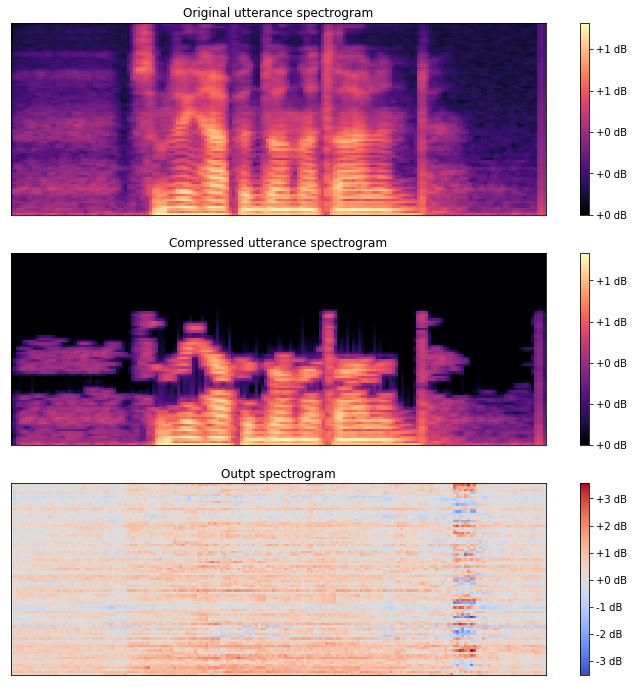

In [2]:
import torch
from torch import optim
from torch.autograd import Variable
import numpy as np
import pickle
from utils import Hps
from preprocess.tacotron.norm_utils import spectrogram2wav, get_spectrogram
from scipy.io.wavfile import write
import glob
import os
from solver import Solver
import librosa
import librosa.display
from plots import plot
%matplotlib inline

args_hps='vctk.json'
args_model="model_vctk/model_vctk-80002"
args_source="test/p270_462.wav"
args_source_8="test/p270_462-8.wav"
args_target=18
args_output="test/output.wav"
args_sample_rate=16000
args_use_gen=True
wavenet_mel=True

hps = Hps()
hps.load(args_hps)
hps_tuple = hps.get_tuple()
solver = Solver(hps_tuple, None, wavenet_mel=wavenet_mel)
solver.load_model(args_model)
spec = get_spectrogram(args_source, wavenet_mel)
spec_8 = get_spectrogram(args_source_8, wavenet_mel)

spec_expand = np.expand_dims(spec_8, axis=0)
spec_tensor = torch.from_numpy(spec_expand).type(torch.FloatTensor)
c = Variable(torch.from_numpy(np.array([int(args_target)]))).cuda()
result = solver.test_step(spec_tensor, c, gen=args_use_gen)
result = result.squeeze(axis=0).transpose((1, 0))
if not wavenet_mel:
    wav_data = spectrogram2wav(result)
    write(args_output, rate=args_sample_rate, data=wav_data)

plot(spec.T, spec_8.T, result.T)

# WaveNet synthesis

In [6]:
import torch
import librosa
import pickle
from vocoder.synthesis import build_model
from vocoder.synthesis import wavegen
import numpy as np

spect=result

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = build_model().to(device)
checkpoint = torch.load("autovc_wavenet_checkpoint_step001000000_ema.pth", map_location=device)
model.load_state_dict(checkpoint["state_dict"])

waveform = wavegen(model, c=spect)   
librosa.output.write_wav('test/output_wavenet'+'.wav', waveform, sr=16000)

100%|██████████| 47104/47104 [07:04<00:00, 110.89it/s]
